In [19]:
from soilgrids import SoilGrids
import pandas as pd

“get_coverage_data()” method includes multiple parameters for data download. Details for each parameter are listed below.

- **service_id**: The identifier of each map service provided by the SoilGrids system. The supported service id and the corresponding variable names are shown below. The “map_services” attribute of an instance will show more detailed information.
    - **bdod**: Bulk density
    - **cec**: Citation exchange capacity at ph7
    - **cfvo**: Coarse fragments volumetric
    - **clay**: Clay content
    - **nitrogen**: Nitrogen
    - **phh2o**: Soil pH in H2O
    - **sand**: Sand content
    - **silt**: Silt content
    - **soc**: Soil organic carbon content
    - **ocs**: Soil organic carbon stock
    - **ocd**: Organic carbon densities
    
- **coverage_id**: The identifier of a coverage(map) from a map service. Each map service supports multiple coverages. To get a list of the coverage id from a map service, use “get_coverage_list()” method. To learn the meaning of the coverage id, please visit the SoilGrids FAQ page

- **crs**: the coordinate system code of a coverage. To get the supported crs code list of a coverage, use “get_coverage_info()” method.

- **west, south, east, north**: The bounding box values for the downloaded data. These values should be based on the coordinate system specified by the “crs” parameter. The west and south values are for the point on the lower left corner of the bounding box. The east and north values are for the point on the upper right corner of the bounding box.

- **output**: The file path of the GeoTiff file to store the downloaded data with “.tif” file extension.

- **resx, resy**: The grid resolution for the downloaded data when “crs” parameter is set as a projection coordinate system(e.g., epsg 152160). The default value for resx and resy is set as 250 (m) if not specified by the user. This is the same grid resolution as the soil datasets in the SoilGrids system. The resx and resy parameters are required when the “crs” parameter is set as a projection coordinate system and the width and height values are not needed.

- **width, height**: The width and height of the raster for the downloaded data when “crs” parameter is set as a geographic coordinate system(e.g., epsg 4326 for WGS84). The height represents the number of rows and the width represents the number of columns for the raster grid of the downloaded data. The width and height parameters are required when the “crs” is set as a geographic coordinate system and resx and resy values are not needed.

- **response_crs**: the coordinate system code for the GeoTiff file of the downloaded data. If response_crs is not specified by the user, its value will be the same as the crs value.

- **local_file**: indicate whether to make it priority to get the data by loading a local file that matches with the output file path. Default value is set as False, which means the function will directly download the data from SoilGrids system. If value is set as True, the function will first try to open a local file that matches with the output file path. And if the local file doesn’t exist, it will then download data from SoilGrids.

In [3]:


# get data from SoilGrids
soil_grids = SoilGrids()
data = soil_grids.get_coverage_data(service_id='bdod', coverage_id='phh2o_0-5cm_mean',
                                       west=-1784000, south=1356000, east=-1140000, north=1863000,
                                       crs='urn:ogc:def:crs:EPSG::152160',output='test.tif')

# show metadata
for key, value in soil_grids.metadata.items():
    print('{}: {}'.format(key,value))


variable_name: Soil pH in H2O
variable_units: pH*10
service_url: https://maps.isric.org/mapserv?map=/map/phh2o.map
service_id: phh2o
coverage_id: phh2o_0-5cm_mean
crs: urn:ogc:def:crs:EPSG::152160
bounding_box: (-1784000, 1356000, -1140000, 1863000)
grid_res: [250, 250]


In [4]:
data

<xarray.DataArray (band: 1, y: 2028, x: 2576)>
[5224128 values with dtype=int16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -1.784e+06 -1.784e+06 ... -1.14e+06 -1.14e+06
  * y            (y) float64 1.863e+06 1.863e+06 ... 1.356e+06 1.356e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_XRESOLUTION:     72
    TIFFTAG_YRESOLUTION:     72
    scale_factor:            1.0
    add_offset:              0.0

In [1]:
import matplotlib.pyplot as plt
from soilgrids import SoilGrids

# get data from SoilGrids
soil_grids = SoilGrids()
data = soil_grids.get_coverage_data(service_id='bdod', coverage_id='bdod_5-15cm_mean', 
                                    west=-59.01, south=-34.99, east=-52.93, north=-29.89,                                     
                                    crs='urn:ogc:def:crs:EPSG::4326', local_file=False,
                                    width = 316, height = 275,
                                    output='test.tif')

In [8]:
import matplotlib.pyplot as plt
from soilgrids import SoilGrids

# get data from SoilGrids
soil_grids = SoilGrids()
soil_grids.get_coverage_list(service_id='bdod')

"bdod" map service includes 30 coverages(maps)

bdod_0-5cm_Q0.5
bdod_0-5cm_Q0.05
bdod_0-5cm_Q0.95
bdod_0-5cm_mean
bdod_0-5cm_uncertainty
bdod_5-15cm_Q0.5
bdod_5-15cm_Q0.05
bdod_5-15cm_Q0.95
bdod_5-15cm_mean
bdod_5-15cm_uncertainty
bdod_15-30cm_Q0.5
bdod_15-30cm_Q0.05
bdod_15-30cm_Q0.95
bdod_15-30cm_mean
bdod_15-30cm_uncertainty
bdod_30-60cm_Q0.05
bdod_30-60cm_Q0.5
bdod_30-60cm_Q0.95
bdod_30-60cm_mean
bdod_30-60cm_uncertainty
bdod_60-100cm_Q0.05
bdod_60-100cm_Q0.5
bdod_60-100cm_Q0.95
bdod_60-100cm_mean
bdod_60-100cm_uncertainty
bdod_100-200cm_Q0.05
bdod_100-200cm_Q0.5
bdod_100-200cm_Q0.95
bdod_100-200cm_mean
bdod_100-200cm_uncertainty


In [15]:
from owslib.wcs import WebCoverageService

wcs = WebCoverageService('https://maps.isric.org/mapserv?map=/map/bdod.map', version='1.0.0')
coverage_obj = wcs.contents['bdod_5-15cm_mean']
coverage_obj.supportedCRS

[urn:ogc:def:crs:EPSG::152160,
 urn:ogc:def:crs:EPSG::4326,
 urn:ogc:def:crs:EPSG::3857,
 urn:ogc:def:crs:EPSG::54009,
 urn:ogc:def:crs:EPSG::54012,
 urn:ogc:def:crs:EPSG::152160]

Text(0.5, 1.0, 'Mean bulk density between 5 and 15 cm soil depth in Uruguay')

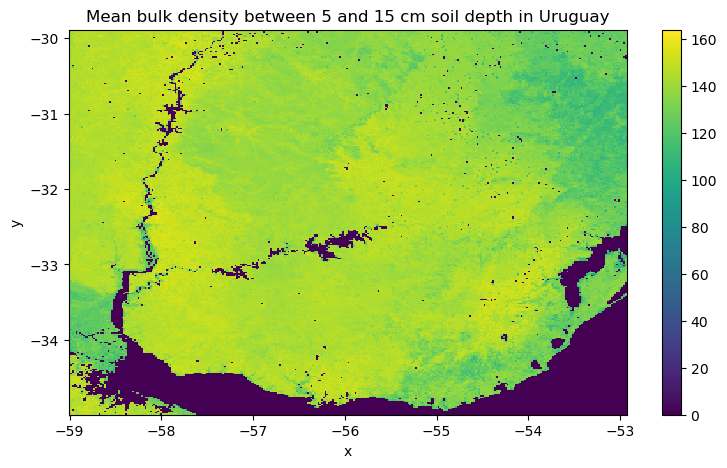

In [2]:
# plot data
data.plot(figsize=(9,5))
plt.title('Mean bulk density between 5 and 15 cm soil depth in Uruguay')

In [21]:
df = pd.DataFrame(data.to_dataframe(name="bulk density").reset_index())
df

,band,y,x,spatial_ref,bulk density
0,1,1862875.0,-1783875.0,0,0
1,1,1862875.0,-1783625.0,0,0
2,1,1862875.0,-1783375.0,0,0
3,1,1862875.0,-1783125.0,0,0
4,1,1862875.0,-1782875.0,0,0
...,...,...,...,...,...
5224123,1,1356125.0,-1141125.0,0,136
5224124,1,1356125.0,-1140875.0,0,136
5224125,1,1356125.0,-1140625.0,0,136
5224126,1,1356125.0,-1140375.0,0,136


In [50]:
import geopandas

gdf = geopandas.read_file("wosis_latest/wosis_latest_profiles_Uruguay.shp")

In [51]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

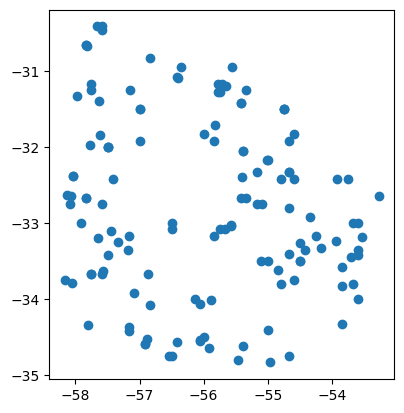

In [52]:
gdf.plot()

In [54]:
#gdf_152160 = gdf.to_crs("EPSG:152160")
gdf_4326 = gdf.to_crs("EPSG:4326")
gdf_3857 = gdf.to_crs("EPSG:3857")
#gdf_54009 = gdf.to_crs("EPSG:54009")
#gdf_54012 = gdf.to_crs("EPSG:54012")
#gdf_152160 = gdf.to_crs("EPSG:152160")

<AxesSubplot: >

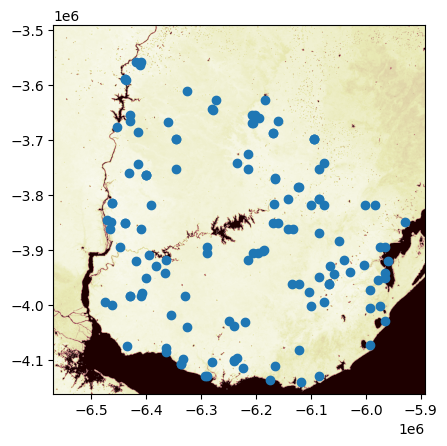

In [55]:
import rasterio
from rasterio.plot import show


src = rasterio.open('test.tif')
fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap='pink')

gdf_3857.plot(ax=ax)

In [36]:
gdf_4326.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
gdf_3857.crs


<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
# NO USAR ESTE METODO, EL DE ABAJO ES EL QUE FUNCIONA

from pyproj import Proj, transform

west=-59.01
south=-34.99
east=-52.93
north=-29.89

P3857 = Proj(init='epsg:3857')
P4326 = Proj(init='epsg:4326')

west_3857, north_3857 = transform(P4326, P3857, west, north)
east_3857, south_3857 = transform(P4326, P3857, east, south)

d:\anaconda3\envs\wosis\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
d:\anaconda3\envs\wosis\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Lucho\AppData\Local\Temp\ipykernel_25216\3468226137.py:11: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  west_3857

In [56]:
# import pyproj
from pyproj import Transformer

# sinu = pyproj.Proj("+proj=sinu +R=6371007.181 +nadgrids=@null +wktext")
# wgs84 = pyproj.Proj("+init=EPSG:4326") 
# lon, lat= pyproj.transform(sinu, wgs84, xv, yv)

#sinu = '+proj=sinu +R=6371007.181 +nadgrids=@null +wktext'
west=-59.01
south=-34.99
east=-52.93
north=-29.89

#easting, northing = t.transform(xv, yv)

t = Transformer.from_crs(crs_from="epsg:4326", crs_to="epsg:3857", always_xy=True)
west_3857, north_3857 = t.transform(west, north)
east_3857, south_3857 = t.transform(east, south)

In [57]:
import matplotlib.pyplot as plt
from soilgrids import SoilGrids

# get data from SoilGrids
soil_grids = SoilGrids()
data = soil_grids.get_coverage_data(service_id='bdod', coverage_id='bdod_5-15cm_mean', 
                                    west=west_3857, south=south_3857, east=east_3857, north=north_3857,                                     
                                    crs='urn:ogc:def:crs:EPSG::3857', local_file=False,
                                    output='test.tif')

Text(0.5, 1.0, 'Mean bulk density between 5 and 15 cm soil depth in Uruguay')

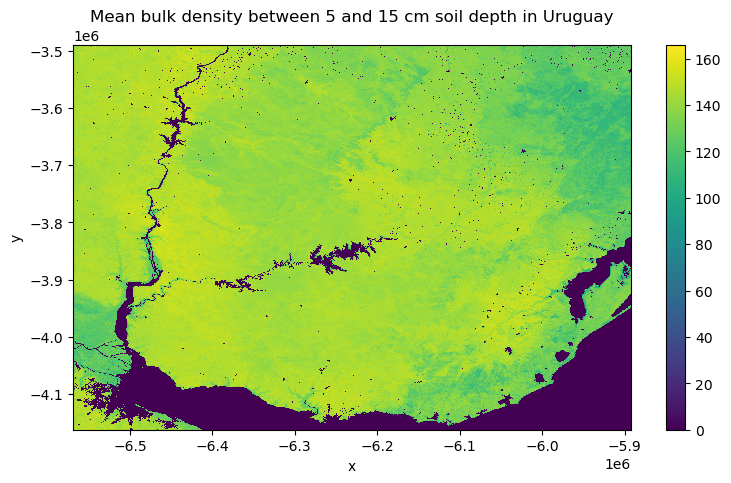

In [58]:
# plot data
data.plot(figsize=(9,5))
plt.title('Mean bulk density between 5 and 15 cm soil depth in Uruguay')

In [59]:
coord_list = [(x,y) for x,y in zip(gdf_3857['geometry'].x , gdf_3857['geometry'].y)]
gdf_3857['value'] = [x for x in src.sample(coord_list)]
gdf_3857.head()

,gml_id,profile_id,dataset_id,continent,country_id,country_na,geom_accur,latitude,longitude,dsds,...,wg0200,wg0500,wg1500,wv0010,wv0033,wv0100,wv0500,wv1500,geometry,value
0,wosis_latest_profiles.623792,623792,{WD-NWAFU-SCS},Americas,UY,Uruguay,0.000001,-34.616665,-55.383335,10,...,false,false,false,false,false,false,false,false,POINT (-6165244.651 -4111908.705),[134]
1,wosis_latest_profiles.69741,69741,"{WD-ISIS,WD-WISE}",Americas,UY,Uruguay,0.100000,-31.083333,-56.416667,153,...,false,false,false,false,false,false,false,false,POINT (-6280274.643 -3643576.255),[138]
2,wosis_latest_profiles.69609,69609,"{WD-ISIS,WD-WISE}",Americas,UY,Uruguay,0.100000,-32.666667,-57.833333,137,...,false,false,false,false,false,false,false,false,POINT (-6437977.180 -3851142.704),[151]
3,wosis_latest_profiles.70922,70922,"{LAC-SOTER,WD-WISE}",Americas,UY,Uruguay,0.010000,-33.099722,-57.450000,114,...,false,false,false,false,false,false,false,false,POINT (-6395304.746 -3908547.884),[0]
4,wosis_latest_profiles.68675,68675,{WD-WISE},Americas,UY,Uruguay,0.100000,-34.366667,-57.166667,97,...,false,false,false,false,false,false,false,false,POINT (-6363764.261 -4078143.352),[147]


In [60]:
gdf_3857[['profile_id', 'value']]

,profile_id,value
0,623792,[134]
1,69741,[138]
2,69609,[151]
3,70922,[0]
4,68675,[147]
...,...,...
131,177125,[148]
132,69897,[144]
133,69562,[148]
134,69589,[140]


In [79]:
import pandas as pd

summary = pd.read_csv("profile_summary.csv")
summary_with_missing_bulk = summary.merge(gdf_3857[['profile_id', 'value']], on='profile_id', how='outer')
summary_with_missing_bulk.to_csv("solo_mirar_uruguay.csv")

In [85]:
import numpy as np

summary_with_missing_bulk[summary_with_missing_bulk['bdfi33_pond_val'] >= 0]

,Unnamed: 0,profile_id,country_name,clay_pond_val,bdfi33_pond_val,orgc_pond_val,value
221,221,176579,Argentina,13.286667,1.547333,13.306667,NaN
222,222,176580,Argentina,0.000000,1.412667,13.793333,NaN
223,223,176581,Argentina,15.133333,0.906667,12.933333,NaN
224,224,176582,Argentina,29.513333,1.408000,23.080000,NaN
225,225,176583,Argentina,29.820000,1.132000,25.540000,NaN
226,226,176584,Argentina,46.253333,1.500000,18.160000,NaN
227,227,176585,Argentina,39.853333,1.344000,37.520000,NaN
228,228,176586,Argentina,58.080000,1.442000,22.440000,NaN
229,229,176587,Argentina,30.303333,0.766000,53.813333,NaN
230,230,176588,Argentina,10.333333,1.444667,60.720000,NaN


# ZONAS ECOLOGICAS

In [86]:
gdf = geopandas.read_file("sa_eco_13/sa_eco_l3.shp")

In [106]:
gdf.crs

<Derived Projected CRS: PROJCS["International_1967_Albers",GEOGCS["GCS_Int ...>
Name: International_1967_Albers
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Albers Equal Area
Datum: D_International_1967
- Ellipsoid: International_1967
- Prime Meridian: Greenwich

In [88]:
gdf

,AREA,PERIMETER,SA_ECO_ALB,SA_ECO_A_1,LEVEL3,LEVEL2,LEVEL1,Shape_Leng,Shape_Area,geometry
0,1807720.0,6852.72,2,2,16.1.1,16.1,16,6852.716414,1.807722e+06,"POLYGON ((-2411474.750 6128287.000, -2412024.5..."
1,575091.0,3528.49,3,3,16.1.1,16.1,16,3528.487625,5.750906e+05,"POLYGON ((-2409012.000 6128213.000, -2409861.2..."
2,830940.0,6550.06,4,4,16.1.1,16.1,16,6550.064591,8.309403e+05,"POLYGON ((-2400731.250 6127013.500, -2402100.7..."
3,2268020.0,8768.95,5,5,16.1.1,16.1,16,8768.953053,2.268015e+06,"POLYGON ((-2377034.750 6123303.500, -2377749.0..."
4,2132550.0,7619.32,6,8,16.1.1,16.1,16,7619.324921,2.132549e+06,"POLYGON ((-2330170.250 6122988.000, -2330634.7..."
...,...,...,...,...,...,...,...,...,...,...
3541,856525.0,3590.93,3543,3551,19.3.1,19.3,19,3590.933916,8.565251e+05,"POLYGON ((-547132.312 -2595699.250, -547827.25..."
3542,726499.0,3314.36,3544,3550,19.3.1,19.3,19,3314.359005,7.264993e+05,"POLYGON ((-525415.625 -2596302.250, -525486.12..."
3543,3924720.0,8039.85,3545,3552,19.3.1,19.3,19,8039.853223,3.924722e+06,"POLYGON ((-541317.875 -2599045.750, -541618.68..."
3544,1075790.0,5139.75,3546,3553,19.3.1,19.3,19,5139.748026,1.075786e+06,"POLYGON ((-514855.844 -2600688.000, -515994.00..."


<AxesSubplot: >

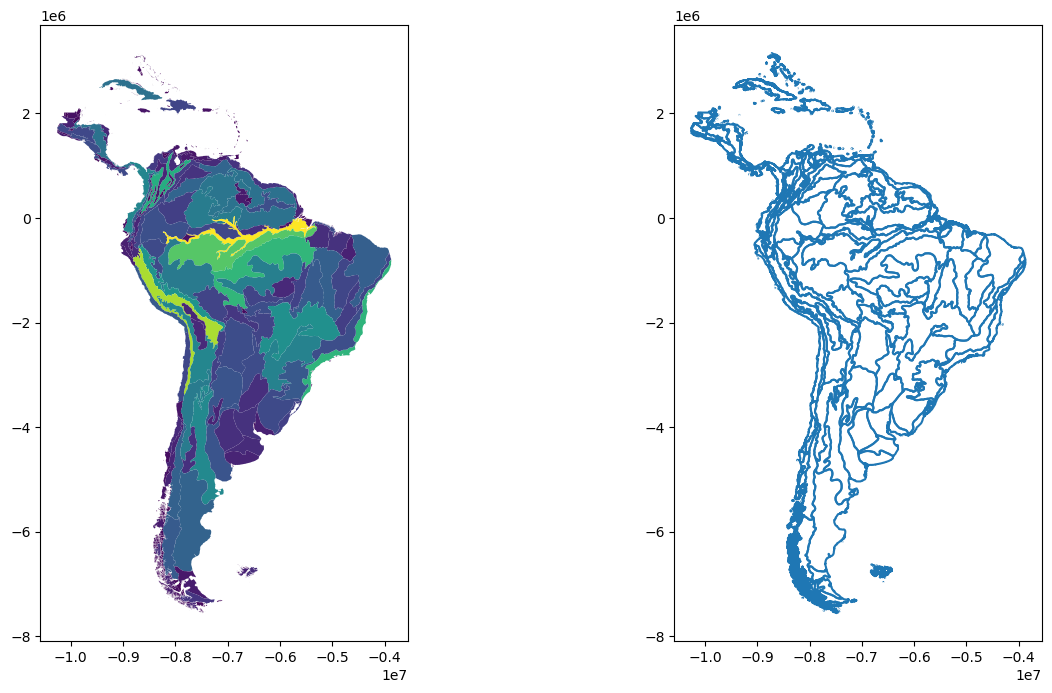

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))
gdf.plot(column='PERIMETER', ax = axes[0])
gdf.boundary.plot(ax = axes[1])

<AxesSubplot: >

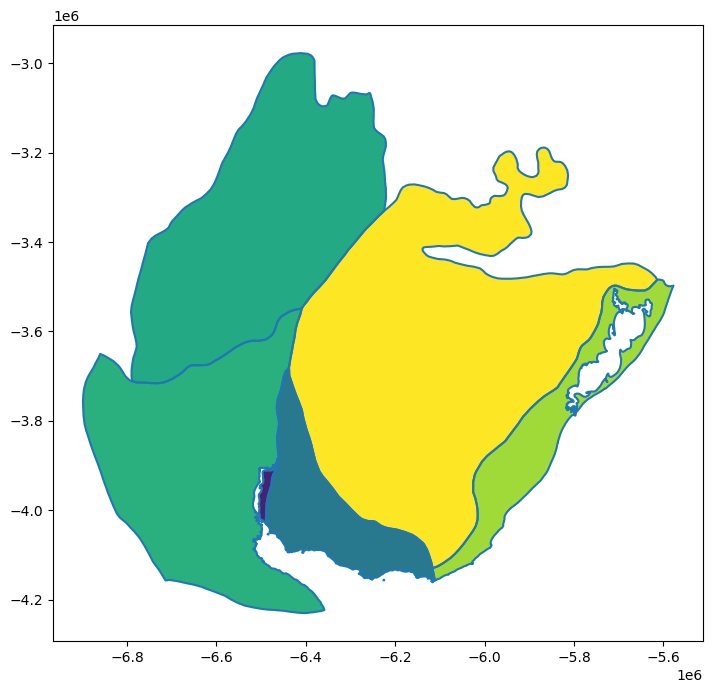

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
gdf = gdf.to_crs("EPSG:3857")
gdf.cx[west_3857:east_3857, south_3857:north_3857].plot(column='PERIMETER', ax=ax)
gdf.cx[west_3857:east_3857, south_3857:north_3857].boundary.plot(ax=ax)

<AxesSubplot: >

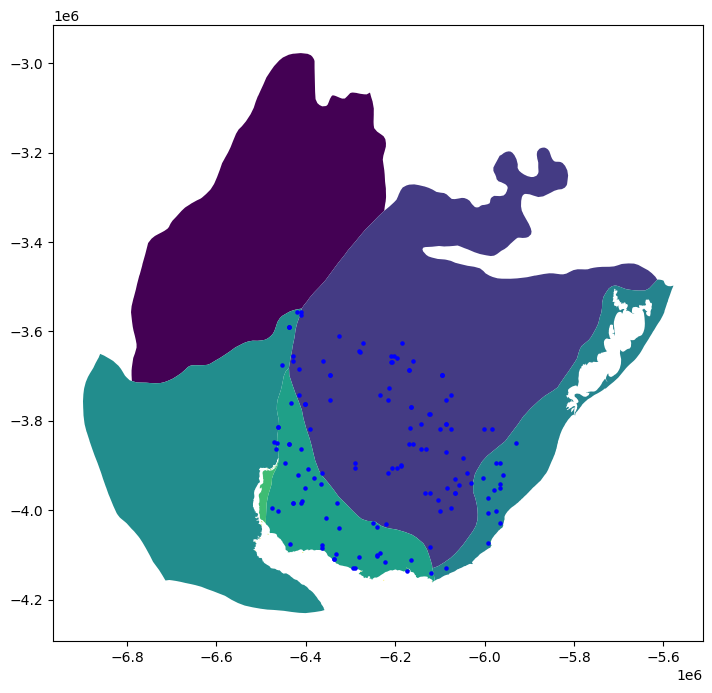

In [131]:
profiles = geopandas.read_file("wosis_latest/wosis_latest_profiles_Uruguay.shp").to_crs("EPSG:3857")

fig, ax = plt.subplots(1, 1, figsize=(15,8))
base = gdf.cx[west_3857:east_3857, south_3857:north_3857].plot(column='SA_ECO_ALB', ax=ax)
profiles.plot(ax=base, marker='o', color='blue', markersize=5)

In [126]:
profiles

,gml_id,profile_id,dataset_id,continent,country_id,country_na,geom_accur,latitude,longitude,dsds,...,wg0100,wg0200,wg0500,wg1500,wv0010,wv0033,wv0100,wv0500,wv1500,geometry
0,wosis_latest_profiles.623792,623792,{WD-NWAFU-SCS},Americas,UY,Uruguay,0.000001,-34.616665,-55.383335,10,...,false,false,false,false,false,false,false,false,false,POINT (-6165244.651 -4111908.705)
1,wosis_latest_profiles.69741,69741,"{WD-ISIS,WD-WISE}",Americas,UY,Uruguay,0.100000,-31.083333,-56.416667,153,...,false,false,false,false,false,false,false,false,false,POINT (-6280274.643 -3643576.255)
2,wosis_latest_profiles.69609,69609,"{WD-ISIS,WD-WISE}",Americas,UY,Uruguay,0.100000,-32.666667,-57.833333,137,...,false,false,false,false,false,false,false,false,false,POINT (-6437977.180 -3851142.704)
3,wosis_latest_profiles.70922,70922,"{LAC-SOTER,WD-WISE}",Americas,UY,Uruguay,0.010000,-33.099722,-57.450000,114,...,false,false,false,false,false,false,false,false,false,POINT (-6395304.746 -3908547.884)
4,wosis_latest_profiles.68675,68675,{WD-WISE},Americas,UY,Uruguay,0.100000,-34.366667,-57.166667,97,...,false,false,false,false,false,false,false,false,false,POINT (-6363764.261 -4078143.352)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,wosis_latest_profiles.177125,177125,{US-NCSS},Americas,UY,Uruguay,0.000010,-32.327946,-54.671806,105,...,false,true,false,true,false,false,false,false,false,POINT (-6086037.605 -3806436.038)
132,wosis_latest_profiles.69897,69897,"{WD-ISIS,WD-WISE}",Americas,UY,Uruguay,0.010000,-34.066975,-56.051903,81,...,false,false,false,false,true,true,false,false,true,POINT (-6239669.300 -4037798.682)
133,wosis_latest_profiles.69562,69562,"{WD-ISIS,WD-WISE}",Americas,UY,Uruguay,0.010000,-34.551636,-56.056647,165,...,false,false,false,false,true,true,false,false,true,POINT (-6240197.400 -4103115.976)
134,wosis_latest_profiles.69589,69589,"{WD-ISIS,WD-WISE}",Americas,UY,Uruguay,0.100000,-32.650000,-53.266667,153,...,false,false,false,false,true,true,false,false,true,POINT (-5929618.247 -3848938.934)


In [130]:
profiles.sjoin(gdf.cx[west_3857:east_3857, south_3857:north_3857], how="inner", predicate='within')

,gml_id,profile_id,dataset_id,continent,country_id,country_na,geom_accur,latitude,longitude,dsds,...,index_right,AREA,PERIMETER,SA_ECO_ALB,SA_ECO_A_1,LEVEL3,LEVEL2,LEVEL1,Shape_Leng,Shape_Area
0,wosis_latest_profiles.623792,623792,{WD-NWAFU-SCS},Americas,UY,Uruguay,0.000001,-34.616665,-55.383335,10,...,1856,4.176190e+10,1282830.0,1858,1867,23.1.3,23.1,23,1.282835e+06,4.176189e+10
2,wosis_latest_profiles.69609,69609,"{WD-ISIS,WD-WISE}",Americas,UY,Uruguay,0.100000,-32.666667,-57.833333,137,...,1856,4.176190e+10,1282830.0,1858,1867,23.1.3,23.1,23,1.282835e+06,4.176189e+10
3,wosis_latest_profiles.70922,70922,"{LAC-SOTER,WD-WISE}",Americas,UY,Uruguay,0.010000,-33.099722,-57.450000,114,...,1856,4.176190e+10,1282830.0,1858,1867,23.1.3,23.1,23,1.282835e+06,4.176189e+10
4,wosis_latest_profiles.68675,68675,{WD-WISE},Americas,UY,Uruguay,0.100000,-34.366667,-57.166667,97,...,1856,4.176190e+10,1282830.0,1858,1867,23.1.3,23.1,23,1.282835e+06,4.176189e+10
7,wosis_latest_profiles.70920,70920,"{LAC-SOTER,WD-WISE}",Americas,UY,Uruguay,0.010000,-33.669722,-57.750000,145,...,1856,4.176190e+10,1282830.0,1858,1867,23.1.3,23.1,23,1.282835e+06,4.176189e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,wosis_latest_profiles.67749,67749,{WD-WISE},Americas,UY,Uruguay,0.100000,-30.416667,-57.666667,122,...,1850,1.357580e+11,2018080.0,1852,1858,23.2.1,23.2,23,2.018077e+06,1.357577e+11
94,wosis_latest_profiles.68692,68692,{WD-WISE},Americas,UY,Uruguay,0.100000,-32.750000,-58.083333,154,...,1850,1.357580e+11,2018080.0,1852,1858,23.2.1,23.2,23,2.018077e+06,1.357577e+11
102,wosis_latest_profiles.70856,70856,"{LAC-SOTER,WD-WISE}",Americas,UY,Uruguay,0.010000,-30.670000,-57.819722,115,...,1850,1.357580e+11,2018080.0,1852,1858,23.2.1,23.2,23,2.018077e+06,1.357577e+11
120,wosis_latest_profiles.177117,177117,{US-NCSS},Americas,UY,Uruguay,0.000010,-32.383251,-58.045334,100,...,1850,1.357580e+11,2018080.0,1852,1858,23.2.1,23.2,23,2.018077e+06,1.357577e+11


In [ ]:
# SOIL GROUPS

In [132]:
gdf = geopandas.read_file("LAC-SOTER/SOTERLAC/GIS/SOTER/SOTERLACv2.shp")

In [135]:
gdf

,AREA,PERIMETER,SOTERLAC_,SOTERLAC_I,NEWSUID,LANDFORM,PARENT_MAT,NUMB_SOILC,COV_PERC_D,DOMSOIL_UN,DOMSOIL_WR,geometry
0,6.501975e+09,8.041300e+05,2,1,MX293,LP,UC,5.0,38.0,SCh,None,"POLYGON ((-115.85013 32.63100, -115.66592 32.6..."
1,9.211768e+08,1.745719e+05,3,2,MX294,TH,IA,2.0,70.0,LPq,None,"POLYGON ((-115.66592 32.64494, -115.46607 32.6..."
2,2.898128e+10,1.292834e+06,4,3,MX295,TH,IA,8.0,43.0,LPq,None,"POLYGON ((-116.64670 31.52670, -116.65244 31.5..."
3,1.183984e+10,8.453308e+05,5,4,MX292,LP,UC,2.0,80.0,RGc,None,"POLYGON ((-114.81612 32.49553, -114.80618 32.4..."
4,6.268041e+05,3.465785e+03,6,5,MX295,TH,IA,8.0,43.0,LPq,None,"POLYGON ((-117.29321 32.43228, -117.29619 32.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5850,8.523319e+05,3.569207e+03,5852,5849,CL15,SH,IA1,3.0,60.0,LPe,None,"POLYGON ((-67.46535 -55.86445, -67.47466 -55.8..."
5851,7.307571e+05,3.620811e+03,5853,5850,CL15,SH,IA1,3.0,60.0,LPe,None,"POLYGON ((-67.16988 -55.88182, -67.17070 -55.8..."
5852,3.906070e+06,7.761437e+03,5854,5851,CL15,SH,IA1,3.0,60.0,LPe,None,"POLYGON ((-67.38837 -55.90261, -67.39242 -55.9..."
5853,1.238173e+06,4.818085e+03,5855,5852,CL15,SH,IA1,3.0,60.0,LPe,None,"POLYGON ((-67.02876 -55.93314, -67.03121 -55.9..."


<AxesSubplot: >

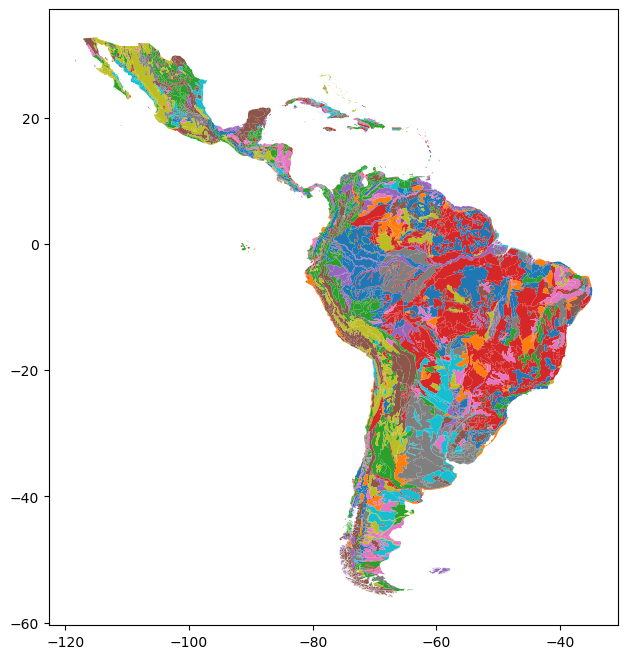

In [143]:

fig, ax = plt.subplots(1, 1, figsize=(15,8))
gdf.plot(column="DOMSOIL_UN", ax=ax)

TypeError: unhashable type: 'Polygon'

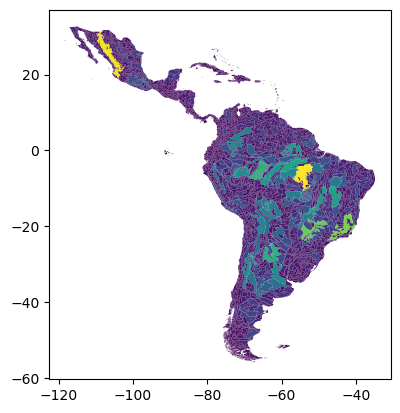

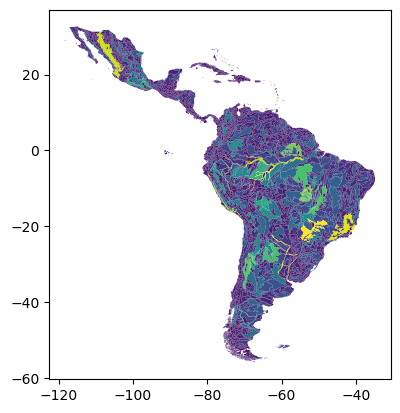

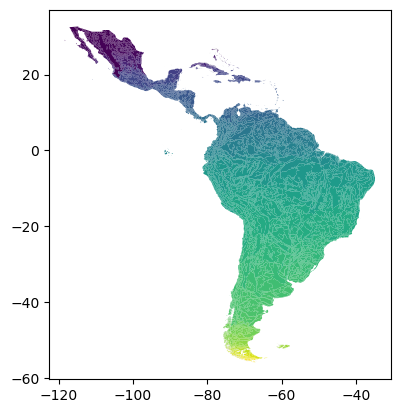

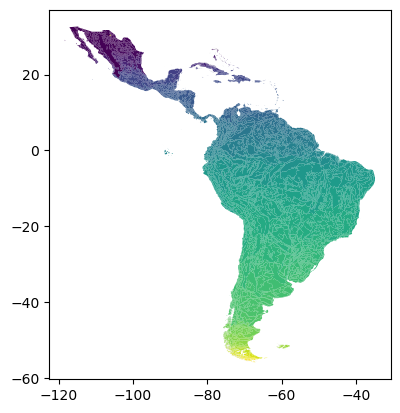

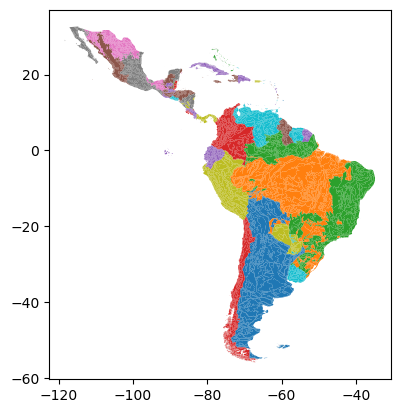

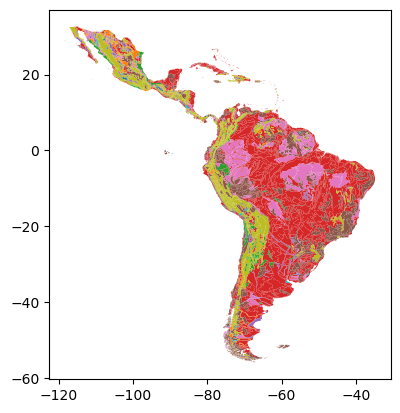

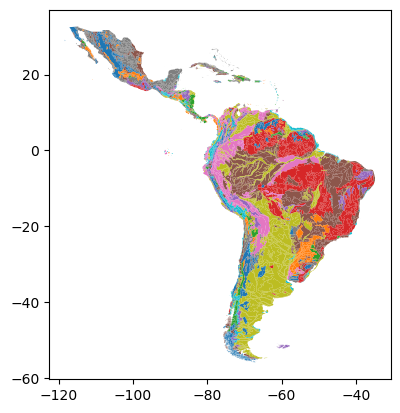

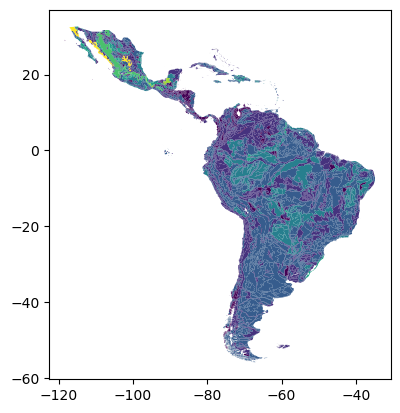

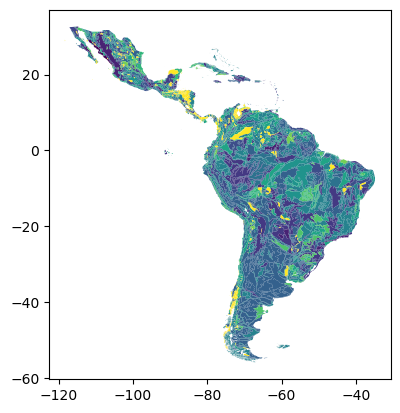

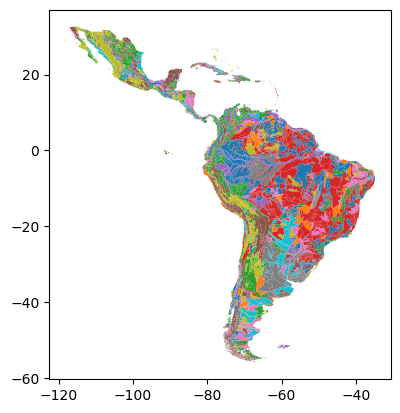

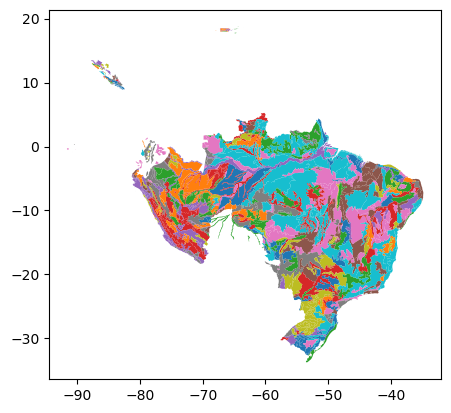

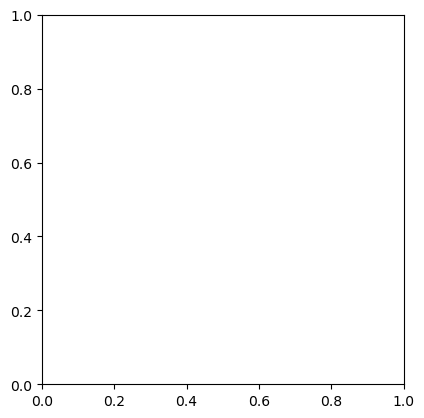

In [141]:
for column in gdf.columns:
    gdf.plot(column=column)